In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import numpy as np

In [54]:
data = pd.read_csv('/content/drive/My Drive/Teste_A3Data/id_desc.csv')

In [55]:
data.head()

,id,desc
0,004c744a-2b82-49b3-a536-90dbb68f368e,Vectra is a cybersecurity platform that uses A...
1,0062d2eb-8210-480a-adef-ec91d0e74855,Roadzen is a global leader in the P&C insuranc...
2,00657562-4dd3-41f9-aceb-df114606bc9e,Restream is a multi-streaming solution that al...
3,00b16654-5d01-4f2f-b6b3-ee2ef13c0d9e,DLP works for 1% of companies; fortunately the...
4,00b4e919-4d10-4ce8-b013-b6cf73ebd780,Shift Technology delivers AI-native decision a...


In [56]:
data.shape

(3617, 2)

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re

In [58]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
def preprocessing_fn(text):

  text = str(text)

  # Text cleansing
  text = text.lower()  # Convert to lowercase
  text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation

  # Remove numbers
  text = re.sub(r'\d+', '', text)
  
  # Remove any other unwanted characters or symbols
  text = re.sub(r'[^\w\s]', '', text) 

  # Tokenization
  tokens = word_tokenize(text)  # Tokenize the text into words

  # Removing stop words
  stop_words = set(stopwords.words("english"))
  filtered_tokens = [token for token in tokens if token not in stop_words]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  return " ".join(lemmatized_tokens)

In [60]:
preprocessing_fn("This is 1 example sentence! It contains some punctuation marks.")

'example sentence contains punctuation mark'

In [61]:
data[data["desc"].isna()]

,id,desc
28,0b24ca09-7a47-4513-91d2-dc0e245c9827,NaN
95,2ea3e420-25ff-43ae-9362-40d0122ceede,NaN
116,37573898-6cf3-4946-9467-0af84fdc7823,NaN
133,4182b4cb-fe1e-4f7f-b090-5455eb84f226,NaN
161,50b3f33a-a7e8-481c-927b-a6fc9c24cde5,NaN
...,...,...
3167,d763163f-c397-4a9b-b0ef-15682ada5c6f,NaN
3192,d9546de6-a6de-436c-b1e0-212091463b13,NaN
3227,dcdf8d62-0f15-4218-bbfc-d5714ca861d0,NaN
3254,debd5d6e-b1af-4a07-82ca-4ec5de31a85c,NaN


In [62]:
data = data.dropna().reset_index(drop=True)

In [63]:
data["stnd_desc"] = data["desc"].apply(preprocessing_fn)

In [64]:
data

,id,desc,stnd_desc
0,004c744a-2b82-49b3-a536-90dbb68f368e,Vectra is a cybersecurity platform that uses A...,vectra cybersecurity platform us ai detect aut...
1,0062d2eb-8210-480a-adef-ec91d0e74855,Roadzen is a global leader in the P&C insuranc...,roadzen global leader pc insurance space insur...
2,00657562-4dd3-41f9-aceb-df114606bc9e,Restream is a multi-streaming solution that al...,restream multistreaming solution allows produc...
3,00b16654-5d01-4f2f-b6b3-ee2ef13c0d9e,DLP works for 1% of companies; fortunately the...,dlp work company fortunately cyberhaven cyberh...
4,00b4e919-4d10-4ce8-b013-b6cf73ebd780,Shift Technology delivers AI-native decision a...,shift technology delivers ainative decision au...
...,...,...,...
3548,ff774652-6e30-4fd7-ae5e-aa07797e2450,OSIsoft is a manufacturer of application softw...,osisoft manufacturer application software real...
3549,ff9a147f-3373-4892-afdd-6d20714c2afe,SAM turns unstructured social media into actio...,sam turn unstructured social medium actionable...
3550,ffae68a3-1974-4cf9-bfa3-a4e4e1eea97d,Lucira Health is a medical technology company ...,lucira health medical technology company focus...
3551,ffb9ffdb-6f54-4f32-8104-09d49a5d058b,Intertech security systems and services intend...,intertech security system service intended org...


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
# Create an instance of TfIdfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)

# Fit the vectorizer on the corpus and transform the documents into TF-IDF vectors
data_vectors = vectorizer.fit_transform(data["stnd_desc"])

# Get the feature names (words) in the vectorizer vocabulary
feature_names = vectorizer.get_feature_names_out()

# Convert to dataframe
data_vectors = pd.DataFrame(data_vectors.toarray(), columns=feature_names)

In [67]:
data_vectors

,ability,able,academic,accelerate,accelerated,accelerates,accelerating,accelerator,accept,access,...,would,writing,year,yet,yield,yoga,york,yorkread,youre,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
data_vectors.sum().sort_values(ascending=False)

company     144.841617
data        129.294425
platform    123.211746
health      109.658117
service      96.044368
               ...    
fixed         1.295849
mini          1.106275
virus         1.096258
lims          0.867968
mdsave        0.560220
Length: 2000, dtype: float64

In [69]:
data_vectors.sum(axis=1).sort_values(ascending=False)

2371    10.579933
1456     9.918102
3410     9.714323
2724     9.579527
940      9.552294
          ...    
2638     1.232987
829      1.225138
3528     1.000000
2162     0.000000
251      0.000000
Length: 3553, dtype: float64

In [70]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [71]:
data_vectors.sum().sort_values(ascending=False)[:100]

company     144.841617
data        129.294425
platform    123.211746
health      109.658117
service      96.044368
               ...    
deliver      27.148111
also         26.929699
hospital     26.454241
life         26.332958
first        25.987090
Length: 100, dtype: float64

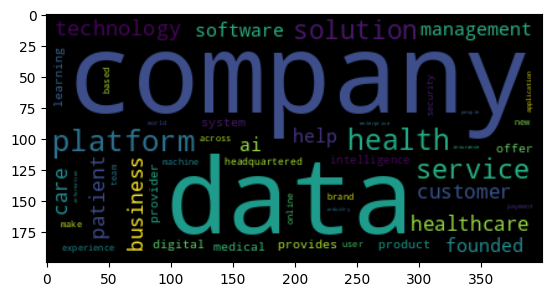

In [72]:
token_weight_dict = {t : w for t, w in data_vectors.sum().sort_values(ascending=False).items()}
wc = WordCloud(max_words=100, margin=10, random_state=1).generate_from_frequencies(token_weight_dict)
default_colors = wc.to_array()
plt.imshow(wc.recolor(random_state=3),interpolation="bilinear")
plt.show()

In [73]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [74]:
svd =  TruncatedSVD(n_components = 100)
svd.fit(data_vectors)

TruncatedSVD(n_components=100)

In [75]:
#Explained variance of each dimension
svd.explained_variance_ratio_.round(4)

array([0.0043, 0.0131, 0.0083, 0.0071, 0.0069, 0.0063, 0.0055, 0.0053,
       0.0052, 0.0049, 0.0047, 0.0045, 0.0044, 0.0043, 0.0042, 0.0042,
       0.004 , 0.0039, 0.0038, 0.0038, 0.0036, 0.0035, 0.0035, 0.0034,
       0.0033, 0.0033, 0.0032, 0.0032, 0.0031, 0.003 , 0.003 , 0.0029,
       0.0028, 0.0028, 0.0028, 0.0028, 0.0027, 0.0027, 0.0026, 0.0026,
       0.0026, 0.0025, 0.0025, 0.0025, 0.0024, 0.0024, 0.0024, 0.0024,
       0.0023, 0.0023, 0.0023, 0.0023, 0.0023, 0.0022, 0.0022, 0.0022,
       0.0022, 0.0022, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.002 ,
       0.002 , 0.002 , 0.002 , 0.002 , 0.002 , 0.002 , 0.0019, 0.0019,
       0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0018,
       0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017,
       0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0016,
       0.0016, 0.0016, 0.0016, 0.0016])

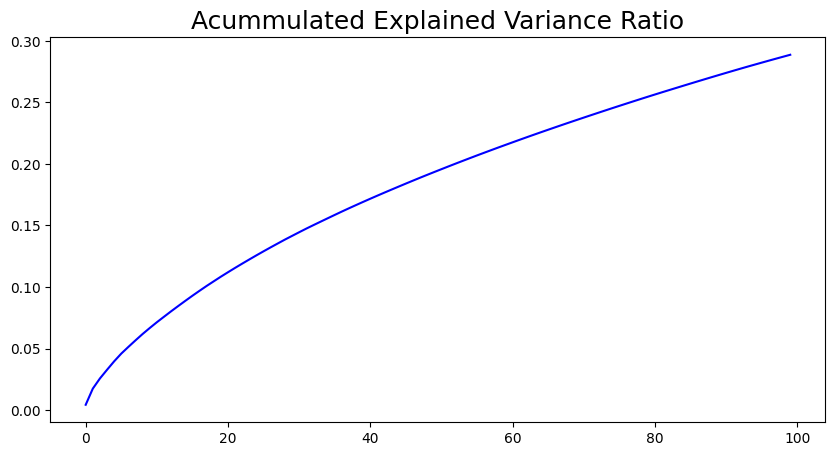

In [76]:
explained_variance_ratio_acum_ = list([(i-1, svd.explained_variance_ratio_[:i].sum()) for i in range(1, 100+1)])
plt.figure(figsize=(10,5))
plt.plot([i for i, r in explained_variance_ratio_acum_], [r for i, r in explained_variance_ratio_acum_], 'b')
plt.title('Acummulated Explained Variance Ratio', fontsize=18); 
plt.show()

In [77]:
data_latent_vectors = svd.transform(data_vectors)
data_latent_vectors = pd.DataFrame(data_latent_vectors, columns=['Dim' + str(c + 1) for c in range(svd.components_.shape[0])])

In [78]:
data_latent_vectors

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,...,Dim91,Dim92,Dim93,Dim94,Dim95,Dim96,Dim97,Dim98,Dim99,Dim100
0,0.234713,-0.147453,0.149217,0.027313,0.051575,-0.066674,0.019869,-0.057584,0.022609,0.152113,...,-0.012284,-0.007519,0.032427,-0.018458,-0.008496,-0.018069,-0.029498,-0.016783,-0.028477,-0.078006
1,0.169013,-0.069183,-0.096812,-0.001885,-0.021398,-0.036698,0.058662,-0.050745,0.037266,-0.042236,...,-0.016586,-0.013895,-0.026303,0.010252,-0.009355,0.001248,-0.007719,0.021606,-0.059139,0.053236
2,0.195365,-0.049100,-0.079719,0.017452,0.038101,-0.004266,-0.002437,0.020542,-0.020656,0.056108,...,-0.011047,-0.052625,-0.021724,0.020781,0.067961,-0.020147,-0.007077,-0.037046,-0.026489,0.050459
3,0.215359,-0.130466,0.220214,0.061257,0.172713,-0.057396,-0.055193,-0.024830,0.015650,0.043764,...,0.106387,-0.062309,-0.001832,-0.024868,0.074108,-0.007159,0.059258,-0.003895,-0.027015,-0.048122
4,0.143516,-0.052279,-0.058644,0.053430,-0.027796,-0.073544,0.128372,-0.031760,0.040365,-0.100195,...,0.051152,-0.051691,0.058864,-0.010037,0.029826,-0.078279,-0.035634,-0.006678,-0.032022,0.002368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,0.314807,-0.179448,0.147737,0.118444,0.114840,-0.041832,-0.004147,-0.007168,0.012298,-0.135004,...,0.046435,0.011145,0.059617,-0.002743,0.061262,-0.024867,0.014259,-0.019777,-0.032672,0.058166
3549,0.196921,-0.093294,0.024001,-0.054624,0.007597,-0.013295,0.022107,-0.033360,-0.046862,0.059651,...,0.015171,-0.007668,0.038904,-0.006504,0.038730,0.101801,-0.031248,-0.050929,0.012170,0.039216
3550,0.102800,0.039978,-0.004254,-0.030982,-0.048360,-0.060324,-0.069765,-0.012265,-0.001412,0.019348,...,-0.066795,-0.009029,0.015748,-0.095628,0.048666,-0.080343,0.068457,-0.036399,-0.000334,-0.067897
3551,0.220471,0.013539,-0.020406,0.194840,0.039792,-0.128222,0.037108,-0.144339,-0.075680,0.121543,...,-0.047598,-0.001426,-0.031278,-0.041713,0.012379,0.015893,-0.064860,0.021324,-0.051057,0.055761


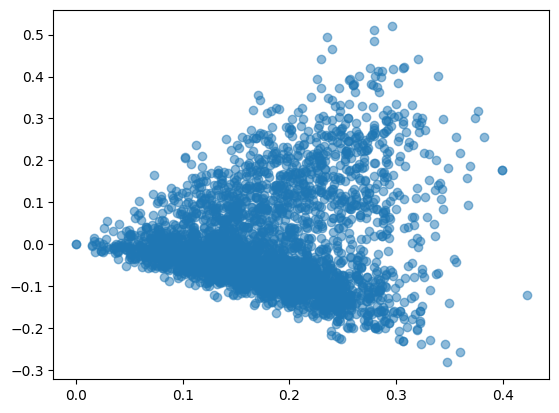

In [79]:
x = data_latent_vectors.Dim1.values
y = data_latent_vectors.Dim2.values

plt.scatter(x, y, alpha=0.5)

plt.show()

In [80]:
c_x_token_matrix = pd.DataFrame(svd.components_, columns=feature_names)
c_x_token_matrix

,ability,able,academic,accelerate,accelerated,accelerates,accelerating,accelerator,accept,access,...,would,writing,year,yet,yield,yoga,york,yorkread,youre,zero
0,0.015194,0.013449,0.005775,0.017546,0.003369,0.006693,0.007238,0.003973,0.003961,0.059654,...,0.005464,0.003341,0.025210,0.004265,0.003006,0.002224,0.028346,0.008501,0.002010,0.004866
1,-0.009300,-0.005186,0.001431,-0.016676,-0.000782,-0.007930,-0.001425,-0.000941,-0.003209,0.026233,...,-0.000423,-0.003641,-0.001717,-0.001712,-0.002808,0.002226,-0.011037,-0.000836,-0.000049,-0.002454
2,-0.007104,-0.002743,0.002779,0.029530,-0.002852,0.005412,0.007205,-0.002713,-0.015663,0.021070,...,0.002988,-0.006184,-0.015360,0.001934,-0.003074,-0.003569,-0.009487,-0.002478,-0.000924,0.002796
3,0.000113,-0.006343,0.004567,-0.006421,0.000727,-0.000875,0.004169,-0.001872,0.008969,0.035745,...,-0.002033,-0.002754,-0.002313,-0.005227,-0.003381,-0.008637,-0.014303,-0.008064,-0.004308,0.000784
4,0.009882,-0.000205,-0.012806,-0.002010,-0.001380,-0.002733,-0.004124,-0.002751,0.002766,0.065940,...,-0.002798,0.001635,-0.006709,0.000412,-0.001919,0.002761,-0.003640,-0.002841,0.002054,0.003773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.008408,0.000604,0.014284,0.027006,-0.005779,0.009223,0.011605,-0.003810,0.002798,0.004491,...,0.010626,0.000023,0.019102,-0.006191,-0.013536,0.011909,0.062289,0.002959,-0.005236,0.001107
96,-0.004183,-0.002964,0.007103,-0.013506,0.010123,0.005883,-0.007931,0.007641,0.005701,0.109639,...,-0.002558,0.012150,0.015235,0.006634,0.001624,-0.030076,0.015854,0.013981,0.007670,0.014426
97,-0.005822,-0.007950,0.002928,0.021958,0.000004,-0.011321,-0.016786,0.000838,0.009034,0.015232,...,0.000937,-0.001730,-0.027466,0.002561,-0.007056,0.006209,-0.024512,-0.008250,0.012779,-0.002031
98,-0.007967,0.002703,0.009398,-0.003350,-0.002440,-0.004835,0.002983,-0.007689,0.012979,-0.018703,...,-0.013905,-0.007463,-0.001028,0.009341,-0.001956,0.021132,0.029879,0.001378,0.011492,0.004403


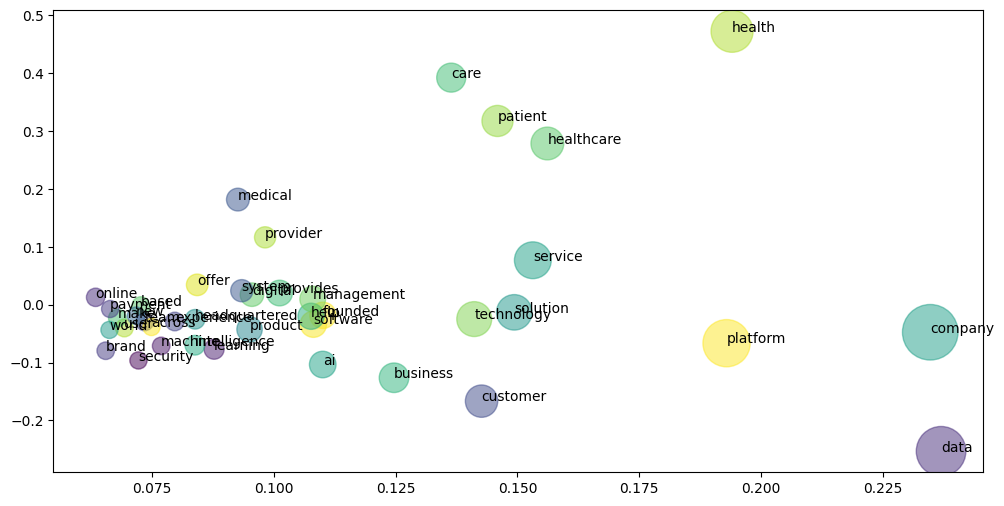

In [109]:
#top 40 tokens

x = c_x_token_matrix.iloc[0][data_vectors.sum().sort_values(ascending=False)[:40].index]
y = c_x_token_matrix.iloc[1][data_vectors.sum().sort_values(ascending=False)[:40].index]
colors = np.random.rand(len(x))
area = (40 * data_vectors.sum().sort_values(ascending=False)[:40].values / max(data_vectors.sum().sort_values(ascending=False)[:40].values))**2  # 0 to 15 point radii

plt.figure(figsize=(12,6))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

for i, txt in enumerate(data_vectors.sum().sort_values(ascending=False)[:40].index):
    plt.annotate(txt, (x[i], y[i]))

plt.show()

In [82]:
top_tokens_on_dims = [pd.DataFrame(sorted([(feature_names[t], w) for t, w in enumerate(svd.components_[c])], key=lambda tup: tup[1])[-10:][::-1], columns=['token', 'weight']) for c in range(svd.components_.shape[0])]

In [83]:
top_tokens_on_dims[0]

,token,weight
0,data,0.236927
1,company,0.234708
2,health,0.194038
3,platform,0.192911
4,healthcare,0.156139
5,service,0.153162
6,solution,0.149345
7,patient,0.145907
8,customer,0.142636
9,technology,0.141132


In [84]:
top_tokens_on_dims[1]

,token,weight
0,health,0.472303
1,care,0.392219
2,patient,0.317365
3,healthcare,0.278442
4,medical,0.181515
5,provider,0.116280
6,hospital,0.094718
7,clinical,0.089191
8,doctor,0.080335
9,service,0.076704


In [85]:
top_tokens_on_dims[2]

,token,weight
0,data,0.599208
1,learning,0.172951
2,ai,0.167069
3,machine,0.158412
4,patient,0.136679
5,clinical,0.114225
6,intelligence,0.101404
7,science,0.097099
8,artificial,0.085316
9,care,0.075363


In [86]:
top_tokens_on_dims[3]

,token,weight
0,healthcare,0.338967
1,service,0.248632
2,payment,0.244145
3,solution,0.211205
4,management,0.185214
5,security,0.168500
6,provider,0.148819
7,software,0.129399
8,provides,0.124470
9,medical,0.115575


In [87]:
top_tokens_on_dims[4]

,token,weight
0,data,0.404468
1,health,0.248170
2,security,0.172029
3,care,0.147860
4,customer,0.139286
5,platform,0.094214
6,cloud,0.091656
7,brand,0.080275
8,marketing,0.071172
9,privacy,0.070517


In [88]:
top_tokens_on_dims[5]

,token,weight
0,patient,0.457729
1,healthcare,0.237910
2,customer,0.176873
3,experience,0.148743
4,brand,0.131781
5,provider,0.110935
6,marketing,0.098415
7,platform,0.095620
8,doctor,0.091352
9,care,0.087306


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

In [90]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

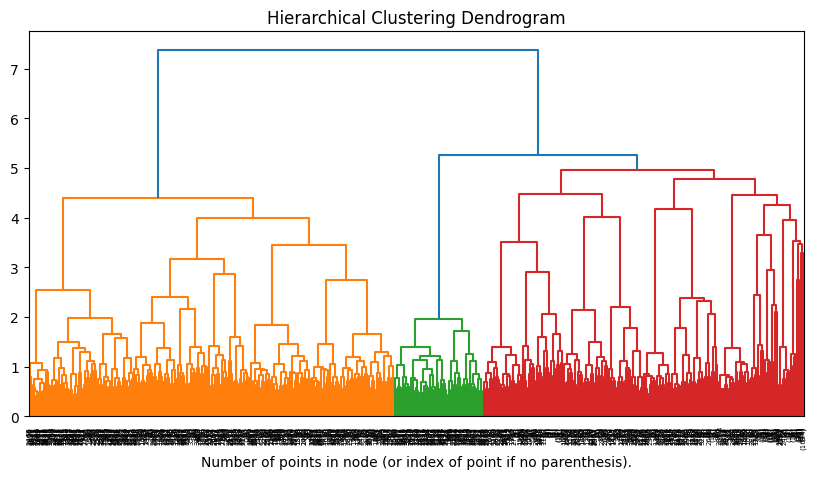

In [91]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(data_latent_vectors)
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [92]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_latent_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [93]:
cluster_data = pd.concat([data_latent_vectors, pd.Series(kmeans.predict(data_latent_vectors), name='cluster')], axis=1)

In [117]:
cluster_data.groupby('cluster')['cluster'].count()

cluster
0    2275
1     764
2     514
Name: cluster, dtype: int64

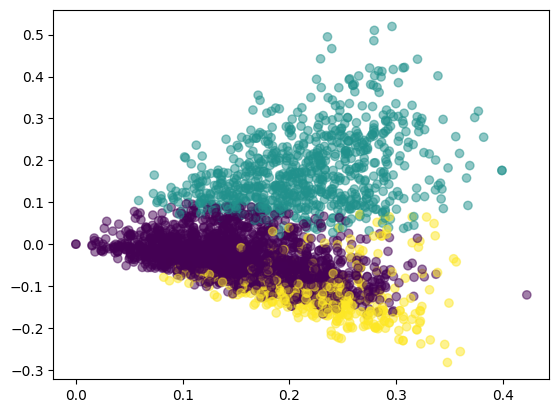

In [94]:
x = cluster_data.Dim1.values
y = cluster_data.Dim2.values
colors = cluster_data.cluster.values

plt.scatter(x, y, c=colors, alpha=0.5)

plt.show()

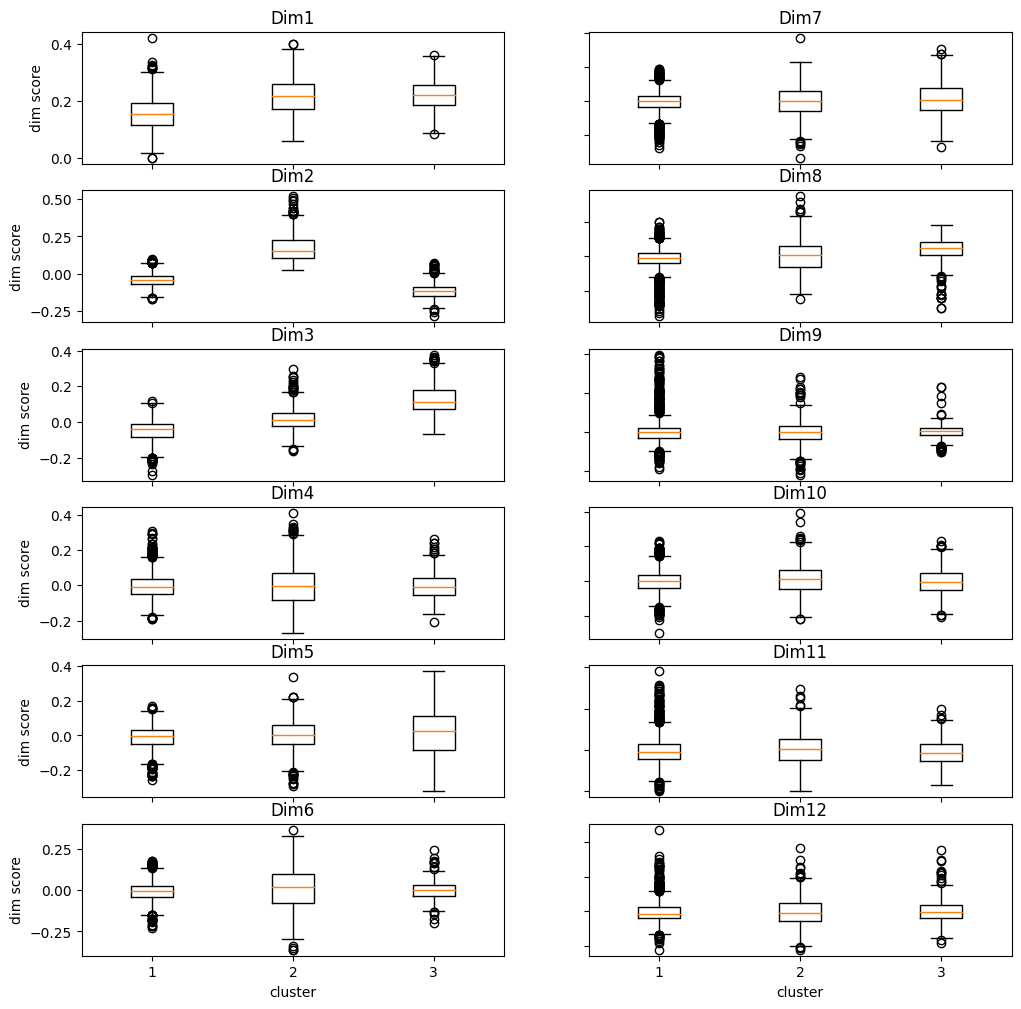

In [110]:
fig, axs = plt.subplots(6, 2,figsize=(12,12))
for i in range(12):
  column = data_latent_vectors.columns[i]
  data_clusters = [cluster_data[cluster_data['cluster']==c][column].values for c in np.unique(cluster_data['cluster'].values)]
  axs[i if i < 6 else i - 6, i // 6].boxplot(data_clusters)
  axs[i if i < 6 else i - 6, i // 6].set_title(column)

for ax in axs.flat:
    ax.set(xlabel='cluster', ylabel='dim score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

In [96]:
data[cluster_data['cluster'] == 0]

,id,desc,stnd_desc
1,0062d2eb-8210-480a-adef-ec91d0e74855,Roadzen is a global leader in the P&C insuranc...,roadzen global leader pc insurance space insur...
2,00657562-4dd3-41f9-aceb-df114606bc9e,Restream is a multi-streaming solution that al...,restream multistreaming solution allows produc...
4,00b4e919-4d10-4ce8-b013-b6cf73ebd780,Shift Technology delivers AI-native decision a...,shift technology delivers ainative decision au...
5,00c83f0f-9a68-4145-8fea-e58f970541c8,Clutch is a Toronto-based technology company t...,clutch torontobased technology company reinven...
6,01569c3d-df62-4033-8539-89bef1a69d34,"FoodLogiQ specializes in supplier management, ...",foodlogiq specializes supplier management food...
...,...,...,...
3545,ff3d7ce0-3b1a-49c3-b9e3-f5d243f4bd8a,Cardless is a credit card company. They help b...,cardless credit card company help brand launch...
3547,ff552371-c2fc-4950-81e8-8c56d5dced7f,Cityzenith is a technology startup that provid...,cityzenith technology startup provides data vi...
3549,ff9a147f-3373-4892-afdd-6d20714c2afe,SAM turns unstructured social media into actio...,sam turn unstructured social medium actionable...
3550,ffae68a3-1974-4cf9-bfa3-a4e4e1eea97d,Lucira Health is a medical technology company ...,lucira health medical technology company focus...


Cluster 0


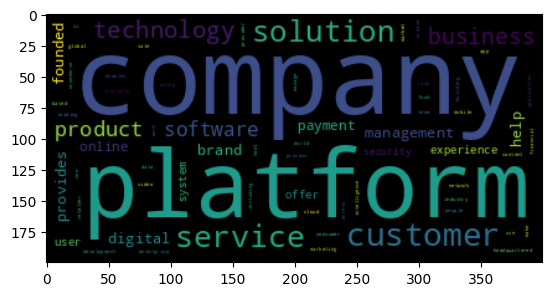

In [97]:
token_weight_dict = {t : w for t, w in data_vectors[cluster_data['cluster'] == 0].sum().sort_values(ascending=False).items()}
wc = WordCloud(max_words=100, margin=10, random_state=1).generate_from_frequencies(token_weight_dict)
default_colors = wc.to_array()
plt.imshow(wc.recolor(random_state=3),interpolation="bilinear")
print("Cluster 0")
plt.show()

Cluster 1


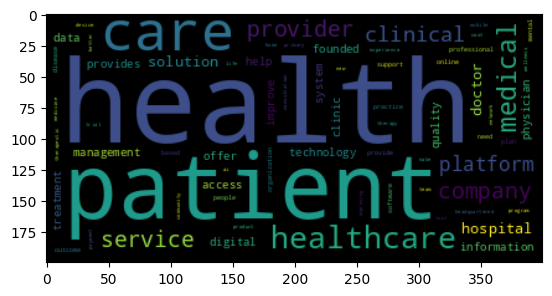

In [98]:
token_weight_dict = {t : w for t, w in data_vectors[cluster_data['cluster'] == 1].sum().sort_values(ascending=False).items()}
wc = WordCloud(max_words=100, margin=10, random_state=1).generate_from_frequencies(token_weight_dict)
default_colors = wc.to_array()
plt.imshow(wc.recolor(random_state=3),interpolation="bilinear")
print("Cluster 1")
plt.show()

Cluster 2


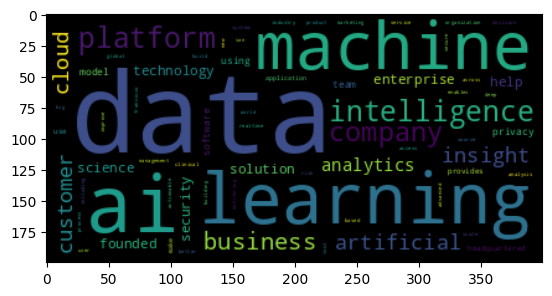

In [100]:
token_weight_dict = {t : w for t, w in data_vectors[cluster_data['cluster'] == 2].sum().sort_values(ascending=False).items()}
wc = WordCloud(max_words=100, margin=10, random_state=1).generate_from_frequencies(token_weight_dict)
default_colors = wc.to_array()
plt.imshow(wc.recolor(random_state=3),interpolation="bilinear")
print("Cluster 2")
plt.show()